In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diagnostic.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
x = df.drop('DEATH_EVENT', axis=1)

In [7]:
y = df['DEATH_EVENT']

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

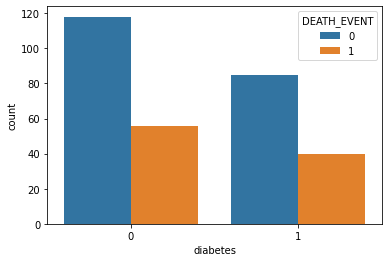

In [9]:
sb.countplot(x='diabetes',data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

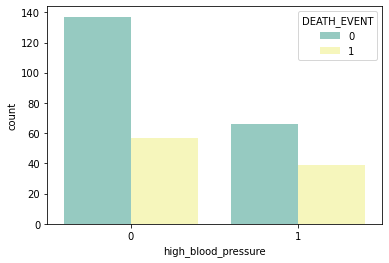

In [10]:
sb.countplot(x='high_blood_pressure',data=df,hue='DEATH_EVENT',palette="Set3")

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
d_tree = DecisionTreeClassifier()

In [15]:
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
x_test.shape

(90, 12)

In [17]:
x_train.shape

(209, 12)

In [18]:
pred = d_tree.predict(x_test)

In [19]:
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [20]:
y_test

107    0
153    0
209    0
204    0
1      1
      ..
159    0
205    0
118    0
71     0
178    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [21]:
d_tree.score(x_test, y_test)

0.6888888888888889

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [23]:
cm = confusion_matrix(y_test, pred)
cm

array([[45, 10],
       [18, 17]], dtype=int64)

In [24]:
# cross check for decision tree score by Accuracy law
accuracy = (48 + 19) / (48 + 10 + 13 + 19)
accuracy

0.7444444444444445

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        55
           1       0.63      0.49      0.55        35

    accuracy                           0.69        90
   macro avg       0.67      0.65      0.66        90
weighted avg       0.68      0.69      0.68        90



In [26]:
#check accuracy score
accuracy_score(y_test, pred)

0.6888888888888889

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
ran = RandomForestClassifier()

In [29]:
ran.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
ran.score(x_test, y_test)

0.8

# Randomized Search Cv

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 500, num = 15)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [2, 3, 4, 5, 6, 7, 8]
min_samples_split = [2, 5, 10, 12, 15]
min_samples_leaf = [2, 4, 6, 8, 10, 15]

#Create ids
grids = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion':['entropy','gini']
}

print(grids)

{'n_estimators': [150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 5, 10, 12, 15], 'min_samples_leaf': [2, 4, 6, 8, 10, 15], 'criterion': ['entropy', 'gini']}


In [33]:
rmcv = RandomizedSearchCV(estimator = ran, param_distributions= grids, n_iter=200, cv=3)

In [ ]:
rmcv.fit(x_train, y_train)

In [ ]:
rmcv.best_params_

In [ ]:
best_parameters = rmcv.best_estimator_

In [ ]:
best_parameters

In [ ]:
rmcv.cv_results_

In [ ]:
results = pd.DataFrame(rmcv.cv_results_)

In [ ]:
results

In [ ]:
best_parameters.predict(x_test)

In [ ]:
best_parameters.score(x_test, y_test)